# Assignment 7 - Clustering (Crime Data)

### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
new_data = data.rename(columns={'Unnamed: 0':'State'})
new_data

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA

In [4]:
data.shape

(50, 5)

In [5]:
data.size

250

In [6]:
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


### Clustering

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [9]:
def norm_funct(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
df_norm = norm_funct(data.iloc[:,1:])

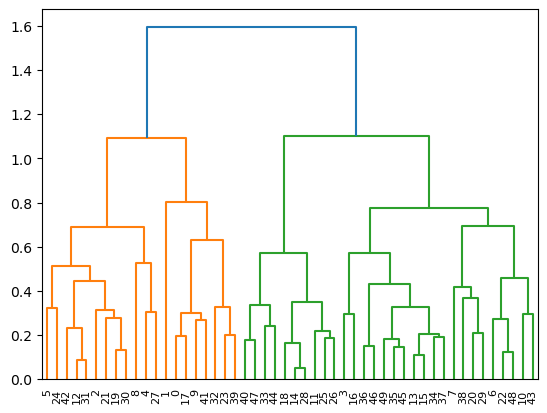

In [11]:
dendogram = sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [12]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [13]:
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['Clusters'])

In [14]:
clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [15]:
new_data['h_clusterid'] = clusters

In [16]:
new_data

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


### K-Means

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(new_data.iloc[:,1:])

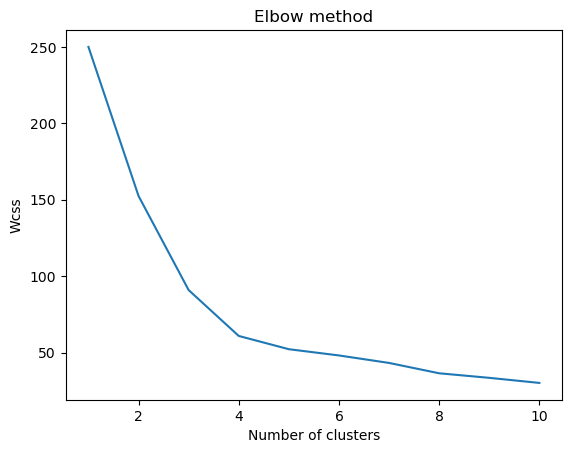

In [19]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.show()

In [20]:
new_clusters = KMeans(4, random_state=42)
new_clusters.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [21]:
new_clusters.labels_

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 1, 2, 3, 0, 1, 0,
       1, 2, 0, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [22]:
new_data['clusterid_new'] = new_clusters.labels_

In [23]:
new_data

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,3,0
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,0
5,Colorado,7.9,204,78,38.7,3,0
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,3,0
9,Georgia,17.4,211,60,25.8,0,2


In [24]:
new_data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,10.883333,256.916667,78.333333,32.250000,3.000000
1,1,5.716667,133.500000,72.222222,18.427778,1.000000
2,2,13.500000,245.777778,53.111111,23.977778,0.111111
3,3,3.127273,76.363636,50.818182,11.554545,1.909091


In [25]:
new_data

,State,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,3,0
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,0
5,Colorado,7.9,204,78,38.7,3,0
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,3,0
9,Georgia,17.4,211,60,25.8,0,2


### DBSCAN

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
new_data2 = new_data.iloc[:,1:5]
new_data2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [28]:
array = new_data2.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [29]:
stscaler = StandardScaler().fit(array)

In [30]:
x = stscaler.transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [31]:
dbscan = DBSCAN(eps=0.8, min_samples=6)

In [32]:
dbscan.fit(x)

DBSCAN(eps=0.8, min_samples=6)

In [33]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [34]:
cl = pd.DataFrame(dbscan.labels_,columns=['clusters'])
cl

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [35]:
pd.concat([new_data2,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,-1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
